⚡ Challenge: Office Energy Consumption Analysis

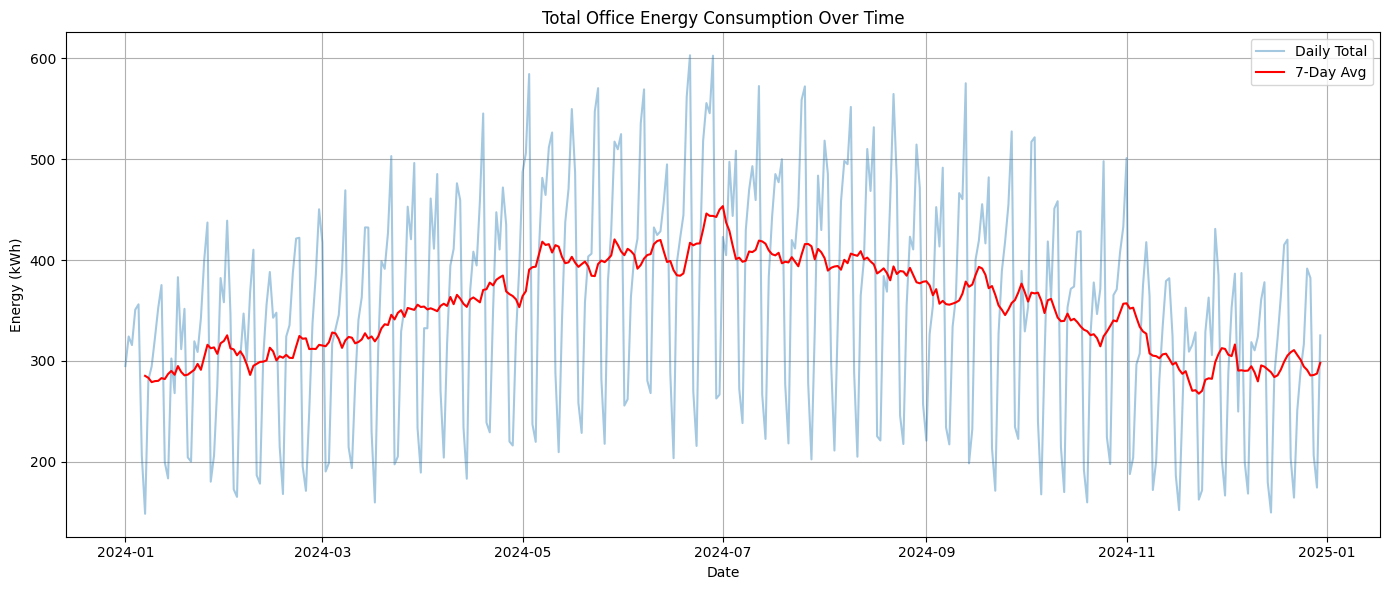

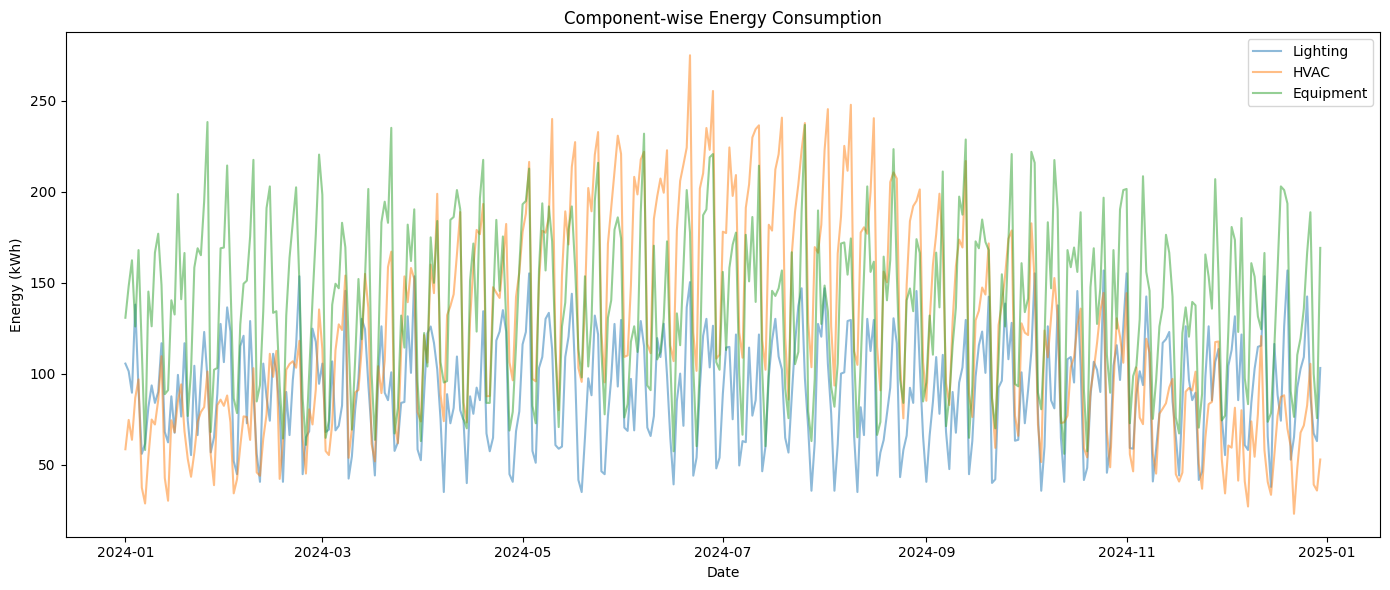

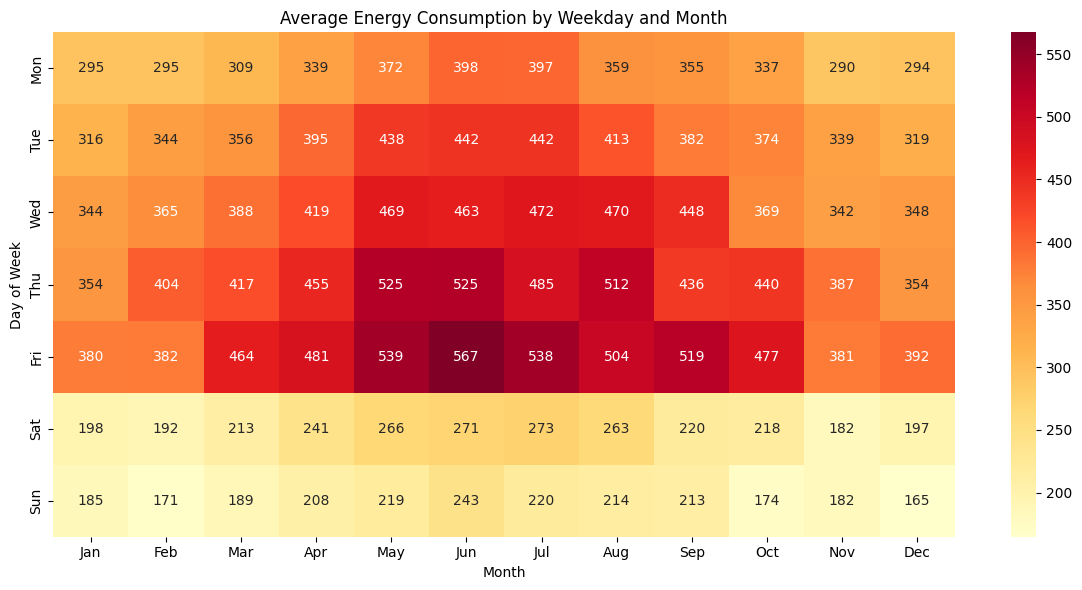

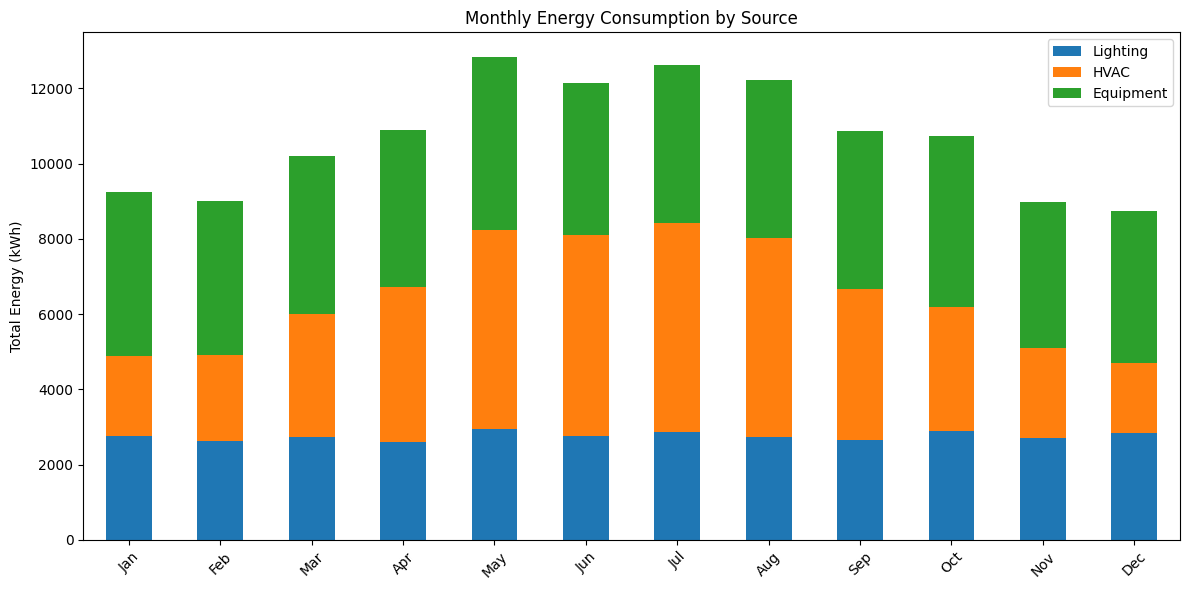

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate 1 year of energy data
np.random.seed(42)
date_range = pd.date_range(start="2024-01-01", periods=365, freq='D')
days = np.arange(365)

# Weekday/Weekend effect
weekday_factor = np.tile([1.2, 1.3, 1.4, 1.5, 1.6, 0.8, 0.7], 53)[:365]

# Seasonal HVAC variation (more in summer/winter)
seasonal_hvac = 100 + 50 * np.sin(2 * np.pi * days / 365 - np.pi/2)  # peaks in Jan & Jul

# Random base consumption
lighting = np.random.randint(50, 100, size=365) * weekday_factor
hvac = (seasonal_hvac + np.random.normal(0, 10, size=365)) * weekday_factor
equipment = np.random.randint(80, 150, size=365) * weekday_factor

df_energy = pd.DataFrame({
    'Date': date_range,
    'Lighting': lighting,
    'HVAC': hvac,
    'Equipment': equipment
})
df_energy['Total'] = df_energy[['Lighting', 'HVAC', 'Equipment']].sum(axis=1)
df_energy['Month'] = df_energy['Date'].dt.month
df_energy['Weekday'] = df_energy['Date'].dt.dayofweek
df_energy['Rolling_Total'] = df_energy['Total'].rolling(window=7).mean()

# 🔌 Total Energy Consumption Over Time
plt.figure(figsize=(14, 6))
plt.plot(df_energy['Date'], df_energy['Total'], label='Daily Total', alpha=0.4)
plt.plot(df_energy['Date'], df_energy['Rolling_Total'], color='red', label='7-Day Avg')
plt.title('Total Office Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ⚙️ Component Breakdown
plt.figure(figsize=(14, 6))
plt.plot(df_energy['Date'], df_energy['Lighting'], label='Lighting', alpha=0.5)
plt.plot(df_energy['Date'], df_energy['HVAC'], label='HVAC', alpha=0.5)
plt.plot(df_energy['Date'], df_energy['Equipment'], label='Equipment', alpha=0.5)
plt.title('Component-wise Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.tight_layout()
plt.show()

# 📆 Heatmap: Total Energy by Month & Weekday
pivot_energy = df_energy.pivot_table(values='Total', index='Weekday', columns='Month', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_energy, cmap='YlOrRd', annot=True, fmt='.0f',
            xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Average Energy Consumption by Weekday and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

# 📊 Monthly Energy by Source
monthly_components = df_energy.groupby('Month')[['Lighting', 'HVAC', 'Equipment']].sum()
monthly_components.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_components.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Energy Consumption by Source')
plt.ylabel('Total Energy (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()